## Lead Score Case Study

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



In [7]:
from scipy import stats


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
# Importing leads file in csv format
leadsdata = pd.read_csv('LeadScore-Leads.csv')

In [11]:
# Looking at the first five rows
leadsdata.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
leadsdata.shape

(9240, 37)

In [13]:
leadsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##  As per the above information, we have - 
        1. 3  integer columns
        2. 4  float valur columns
        3. 30 Object type columns which includes categorical variables

### Let's check if we can assume, Prospect ID as unique identifier or not by checking for duplicate values

In [14]:
doesProspectIDHaveDuplicateValues = leadsdata['Prospect ID'].duplicated().any()
print(doesProspectIDHaveDuplicateValues)
print("Note: False Indicates no duplicate values")

False
Note: False Indicates no duplicate values


In [15]:
null_values = leadsdata.isnull().mean() * 100
null_values = null_values.round(0)
null_values_sorted = null_values.sort_values(ascending=False)
null_values_in_percent_format = null_values_sorted.apply(lambda x: str(x) + '%')
print(null_values_in_percent_format)

Lead Quality                                     52.0%
Asymmetrique Profile Score                       46.0%
Asymmetrique Activity Score                      46.0%
Asymmetrique Profile Index                       46.0%
Asymmetrique Activity Index                      46.0%
Tags                                             36.0%
What is your current occupation                  29.0%
Lead Profile                                     29.0%
What matters most to you in choosing a course    29.0%
Country                                          27.0%
How did you hear about X Education               24.0%
Specialization                                   16.0%
City                                             15.0%
Last Activity                                     1.0%
Page Views Per Visit                              1.0%
TotalVisits                                       1.0%
Receive More Updates About Our Courses            0.0%
I agree to pay the amount through cheque          0.0%
Get update

In [16]:
count_unique_null_perc = pd.value_counts(null_values_sorted)
print(count_unique_null_perc)

0.0     21
46.0     4
29.0     3
1.0      3
52.0     1
36.0     1
27.0     1
24.0     1
16.0     1
15.0     1
dtype: int64


## So, as per the above data - 
    1. We have 21 out of 37 columns have no non-null values
    2. and 16 columns have missing or null values
    3. Highest number of missing values are in the Lead quality column ~52%
    4. And all columns related to "Asymmetrique" have ~46% of missing values

### Data Preparation

##### We have 2 ID coumns and as they are not very useful in model building, we can drop 1 id column can be dropped(Lead ID)

In [17]:

leadsdata.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


#### As we can see,  Lead Number column have IDs, which might not be useful. So we can drop these columns

In [18]:
leadsdata_with_no_IDs = leadsdata.drop(['Lead Number'], axis=1)
leadsdata_with_no_IDs.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
#checking for null values
null_values = leadsdata_with_no_IDs.isnull().sum()
null_values_sorted = null_values.sort_values(ascending = False)
print(null_values_sorted)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

#### Replace All Null values with NaNs

In [20]:
leadsdata = leadsdata.fillna(value=np.nan, inplace=True)

### Data Encoding
    1. Replace Yes/No values to 1/0

In [21]:
user_responses = [
    "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview",
    "Receive More Updates About Our Courses",
    "Do Not Email",
    "Get updates on DM Content",
    "Digital Advertisement",
    "Search",
    "X Education Forums",
    "Newspaper",
    "Update me on Supply Chain Content",
    "Do Not Call",
    "Magazine",
    "Newspaper Article",
    "Through Recommendations"
]

Now, go through all thse columns and change Yes to 1 & No to 0

In [22]:
for user_response in user_responses:
    leadsdata_with_no_IDs[user_response] = leadsdata_with_no_IDs[user_response].apply(lambda x:1 if x == 'Yes' else 0)

In [23]:
leadsdata_with_no_IDs.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Now, let's remove columns with more than 60% of null values

In [24]:
# Calculate the null values ratio for each column
null_values_ratio = leadsdata_with_no_IDs.isnull().mean()

# Get the column names with null values ratio greater than 0.6
cols_to_drop = null_values_ratio[null_values_ratio > 0.6].index

# Drop the columns
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop(cols_to_drop, axis=1)

    


#### Next, Let's replace selects with NaNs

In [25]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.replace({'Select':np.nan})

In [26]:
leadsdata_with_no_IDs.head(5)


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [27]:
leadsdata_with_no_IDs.shape

(9240, 36)

### Now Let's Look at the remaining columns to check for any potential issues

In [28]:
value_counts_aai= leadsdata_with_no_IDs["Asymmetrique Activity Index"].value_counts(dropna=False)
print(value_counts_aai)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


In [29]:
value_counts_api= leadsdata_with_no_IDs["Asymmetrique Profile Index"].value_counts(dropna=False)
print(value_counts_api)

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


In [30]:
value_counts_aas= leadsdata_with_no_IDs["Asymmetrique Activity Score"].value_counts(dropna=False)
print(value_counts_aas)

NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


In [31]:
value_counts_aps= leadsdata_with_no_IDs["Asymmetrique Profile Score"].value_counts(dropna=False)
print(value_counts_aps)

NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


In [32]:
print(leadsdata_with_no_IDs['Asymmetrique Activity Index'].isna().sum())
print(leadsdata_with_no_IDs['Asymmetrique Profile Index'].isna().sum())
print(leadsdata_with_no_IDs['Asymmetrique Activity Score'].isna().sum())
print(leadsdata_with_no_IDs['Asymmetrique Profile Score'].isna().sum())

4218
4218
4218
4218


Since NaNs are very high in these columns and we don't have a clear value to impute, it is better to drop these columns all together to remove any bias

In [33]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.filter(regex='^((?!Asymmetrique).)*$', axis=1)

In [34]:
value_counts_country= leadsdata_with_no_IDs["Country"].value_counts(dropna=False)
print(value_counts_country)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Primarily 95% of the leads are from India, and hence we can impute NaNs with the value "India"

In [35]:
# Replace NaN with 'India' in the 'Country' column
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['Country'].isnull(), 'Country'] = 'India'


In [36]:
value_counts_city = leadsdata_with_no_IDs["City"].value_counts(dropna=False)
print(value_counts_city)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


#### Primarily majority of the leads are from Mumbai, and hence we can impute NaNs with the value "Mumbai"

In [37]:
# Replace NaN with 'India' in the 'Country' column
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['City'].isnull(), 'City'] = 'Mumbai'

In [38]:
value_counts_tags= leadsdata_with_no_IDs["Tags"].value_counts(dropna=False)
print(value_counts_tags)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

##### Primarily majority of the responses is  are from "Will revert after reading the email ", and hence we can impute NaNs with this value

In [39]:
# Replace NaN with 'India' in the 'Country' column
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['Tags'].isnull(), 'Tags'] = 'Will revert after reading the email'

In [40]:
value_counts_wmmtyicac= leadsdata_with_no_IDs["What matters most to you in choosing a course"].value_counts(dropna=False)
print(value_counts_wmmtyicac)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


##### Primarily majority of the responses is  are from "Better Career Prospects", and hence we can impute NaNs with this value

In [41]:
# Replace NaN with 'Better Career Prospects'
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['What matters most to you in choosing a course'].isnull(), 
                                                'What matters most to you in choosing a course'] = 'Better Career Prospects'

In [42]:
value_counts_spec= leadsdata_with_no_IDs["Specialization"].value_counts(dropna=False)
print(value_counts_spec)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


##### We don't have a response with a clear majority , and hence we can impute NaNs with "Others"

In [43]:
# Replace NaN with 'Others'
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['Specialization'].isnull(), 
                                                'Specialization'] = 'Others'

In [44]:
value_counts_wiyco= leadsdata_with_no_IDs["What is your current occupation"].value_counts(dropna=False)
print(value_counts_wiyco)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


##### We have a response with a clear majority , and hence we can impute NaNs with "Unemployed"

In [45]:
# Replace NaN with 'Others'
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['What is your current occupation'].isnull(), 
                                                'What is your current occupation'] = 'Unemployed'

In [46]:
value_counts_hdyhamvp= leadsdata_with_no_IDs["How did you hear about X Education"].value_counts(dropna=False)
print(value_counts_hdyhamvp)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


#### As we have more Nulls than, any other value, we can drop this column

In [47]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop("How did you hear about X Education", axis=1)

Now let's see if we still have NaNs especially in the numeric varibales 

In [48]:
missing_values_percent = (leadsdata_with_no_IDs.isnull().sum() / len(leadsdata_with_no_IDs)) * 100
# Round the values to 2 decimal places
missing_values_percent = missing_values_percent.round(2)

In [49]:
missing_values_percent

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Lead Quality have higher null%s, so let's see if we can impute with meaningful data or drop the column

In [50]:
value_counts_lq= leadsdata_with_no_IDs["Lead Quality"].value_counts(dropna=False)
print(value_counts_lq)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


##### In the above case we will have to chose between "Might be" or " Not sure". Since we have no update from the sales team, it is highly unlikely that this will have a chance to convert . So better to go with "Not Sure"

In [51]:
# Replace NaN with 'Not Sure'
leadsdata_with_no_IDs.loc[leadsdata_with_no_IDs['Lead Quality'].isnull(), 
                                                'Lead Quality'] = 'Not Sure'

In [52]:
value_counts_lp= leadsdata_with_no_IDs["Lead Profile"].value_counts(dropna=False)
print(value_counts_lp)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


##### We do not have a very clear candidate for NaN replacement as without actual feedback we can't classify the NaN as potential lead ot students etc.. so better to drop the column

In [53]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop("Lead Profile", axis=1)

In [54]:
# Calculate the percentage of missing values for each column
missing_values_percent = (leadsdata_with_no_IDs.isnull().sum() / len(leadsdata_with_no_IDs)) * 100
# Round the values to 2 decimal places
missing_values_percent = missing_values_percent.round(2)

In [55]:
missing_values_percent

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

##### Now let's drop remaining null values directly as the contribution is very low

In [56]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.dropna()


In [57]:
value_counts_lead_lac = leadsdata_with_no_IDs["Last Activity"].value_counts(dropna=False)
print(value_counts_lead_lac)


Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


Let's group all smaller value responses into a single varibale called "All Others"

In [58]:
replace_values = ['Resubscribed to emails', 'View in browser link Clicked', 'Had a Phone Conversation', 'Email Received',  'Visited Booth in Tradeshow', 'Email Marked Spam', 'Approached upfront']
for value in replace_values:
    leadsdata_with_no_IDs["Last Activity"] = leadsdata_with_no_IDs["Last Activity"].replace(value, 'All Others')

In [59]:
value_counts_lead_lac = leadsdata_with_no_IDs["Last Activity"].value_counts(dropna=False)
print(value_counts_lead_lac)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
All Others                     42
Name: Last Activity, dtype: int64


In [60]:
value_counts_lead_source = leadsdata_with_no_IDs.groupby("Lead Source").size().reset_index(name='counts')
print(value_counts_lead_source)

          Lead Source  counts
0          Click2call       4
1      Direct Traffic    2543
2            Facebook      31
3              Google    2868
4           Live Chat       2
5              NC_EDM       1
6          Olark Chat    1753
7      Organic Search    1154
8   Pay per Click Ads       1
9       Press_Release       2
10          Reference     443
11     Referral Sites     125
12       Social Media       2
13            WeLearn       1
14   Welingak Website     129
15               bing       6
16               blog       1
17             google       5
18            testone       1
19   welearnblog_Home       1
20     youtubechannel       1


 Group Lead sources with very little count to "All Others"

In [61]:
replace_values = ['WeLearn', 'bing', 'testone', 'Social Media', 'Press_Release', 'youtubechannel', 
                  'Click2call', 'Live Chat', 'blog', 'NC_EDM', 'welearnblog_Home', 'Pay per Click Ads']

leadsdata_with_no_IDs["Lead Source"] = leadsdata_with_no_IDs["Lead Source"].map(lambda x: 'All Others' if x in replace_values else x)

In [62]:
value_counts_lead_source = leadsdata_with_no_IDs.groupby("Lead Source").size().reset_index(name='counts')
print(value_counts_lead_source)

        Lead Source  counts
0        All Others      23
1    Direct Traffic    2543
2          Facebook      31
3            Google    2868
4        Olark Chat    1753
5    Organic Search    1154
6         Reference     443
7    Referral Sites     125
8  Welingak Website     129
9            google       5


##### Check values for converted column which will be our target variable

In [63]:
value_counts_lead_lac = leadsdata_with_no_IDs["Converted"].value_counts(dropna=False)
print(value_counts_lead_lac)

0    5639
1    3435
Name: Converted, dtype: int64


#### This is a balanced set and hence no modifications needed

Now let's examine the relationship of remaining columns to the target variable "Converted"

In [64]:
leadsdata_with_no_IDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   int64  
 4   Do Not Call                                    9074 non-null   int64  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

Let's see the relation between the Lead Quality vs our target varibale Converted relationship

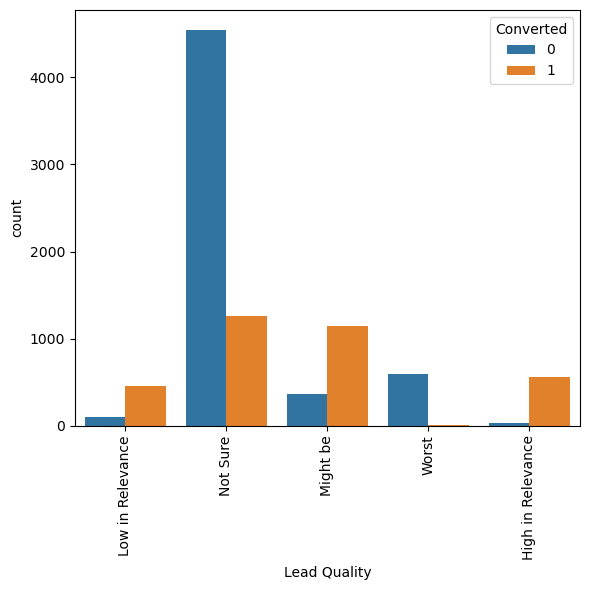

In [65]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create the count plots
sns.countplot(x="Lead Quality", hue="Converted", data=leadsdata_with_no_IDs, ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(hspace=2.0)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

##### Very clearly the answers - "Might be" & "High in Relevance" and "Low in Relavance" have better conv.rate than "Not sure" or "Worst"

Let's see the relation between the Last activity vs our target varibale Converted relationship

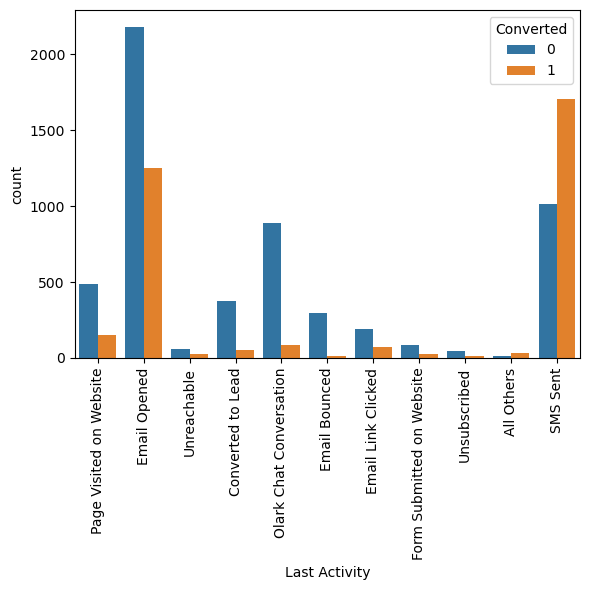

In [66]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create the count plots
sns.countplot(x="Last Activity", hue="Converted", data=leadsdata_with_no_IDs, ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(hspace=2.0)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

#### 

1. Major last activities are "Email opened" & "SMS Sent" and out of these 2 leads are responding to SMS more.
2. So we can focus on improving Email headlines & templates and also try to effectively scale SMS channel

Let's see the relation between the Last Source & Lead Origin vs our target varibale Converted relationship

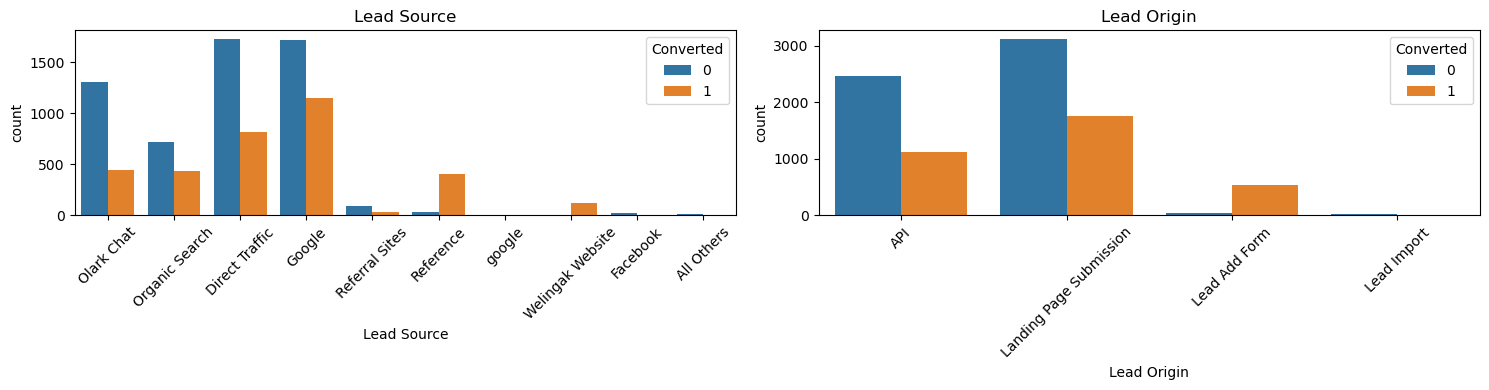

In [67]:

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.countplot(x='Lead Source', hue='Converted', data=leadsdata_with_no_IDs, ax=ax[0])
ax[0].set_title("Lead Source")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


sns.countplot(x='Lead Origin', hue='Converted', data=leadsdata_with_no_IDs, ax=ax[1])
ax[1].set_title("Lead Origin")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

#####      
      1. Lead Add Form has lower contribution to lead generation, but have a very high conversion rate. 
      2. Olark chat, Organic search, Direct traffic & Google are major channels for lead generation with moderate   
      conv.rates while few smaller sources have better convrrate but contribution to lead volume is not that high
      3. Hence, we can combine other lead sources into "All Others"

In [68]:
value_counts_lead_tags = leadsdata_with_no_IDs["Tags"].value_counts(dropna=False)
print(value_counts_lead_tags)

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [69]:
##### Too Many Tags with very little numbers. regroup all of them to "All Others"

In [70]:
replace_values = ['University not recognized','Shall take in the next coming month','in touch with EINS','Interested in Next batch',
                  'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                  'Lateral student','Want to take admission but has financial problems',
                  'In confusion whether part time or DLP','Recognition issue (DEC approval)','Diploma holder (Not Eligible)',
                  'Lost to Others']

leadsdata_with_no_IDs["Tags"] = leadsdata_with_no_IDs["Tags"].map(lambda x: 'All Others' if x in replace_values else x)

In [71]:
value_counts_lead_tags = leadsdata_with_no_IDs["Tags"].value_counts(dropna=False)
print(value_counts_lead_tags)

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
All Others                              281
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
invalid number                           83
wrong number given                       47
Name: Tags, dtype: int64


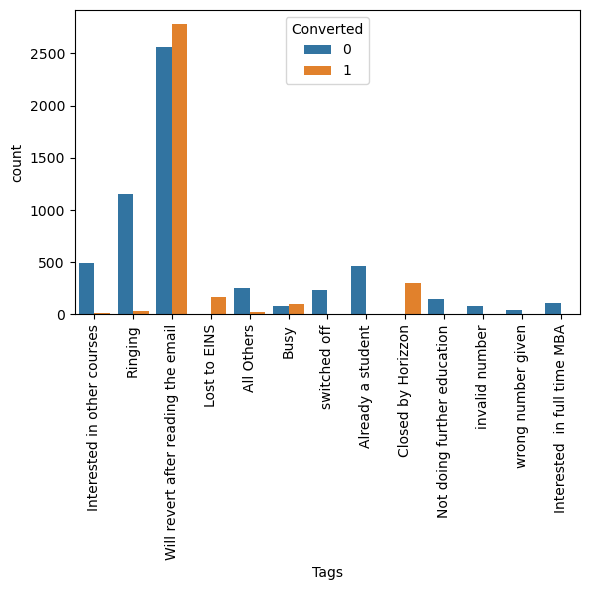

In [72]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create the count plots
sns.countplot(x="Tags", hue="Converted", data=leadsdata_with_no_IDs, ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(hspace=2.0)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

##### By looking at the data we can conclude that "Closed by Horizon" & " Will revert after reading the email" Tags have higher conv.rates

In [73]:
value_counts_lead_wmmycc = leadsdata_with_no_IDs["What is your current occupation"].value_counts(dropna=False)
print(value_counts_lead_wmmycc)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


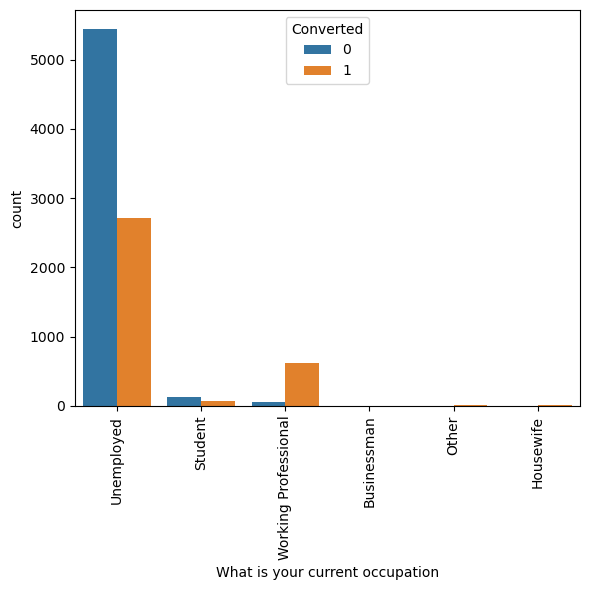

In [74]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create the count plots
sns.countplot(x="What is your current occupation", hue="Converted", data=leadsdata_with_no_IDs, ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(hspace=2.0)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

Clearly Working Professional occupation have a very high conv.rate compared to others

In [75]:
value_counts_lead_spl = leadsdata_with_no_IDs["Specialization"].value_counts(dropna=False)
print(value_counts_lead_spl)

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


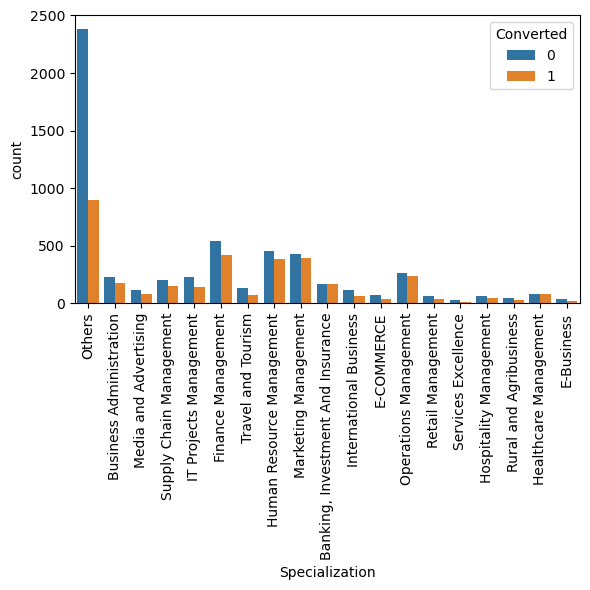

In [76]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create the count plots
sns.countplot(x="Specialization", hue="Converted", data=leadsdata_with_no_IDs, ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(hspace=2.0)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

##### Almost all of the specializations have lower conv.rates, marginally - "Marketing Management" & "Operations Management" have better converted, but the lead share is much lower

In [77]:
value_counts_lead_wmmycc = leadsdata_with_no_IDs["What matters most to you in choosing a course"].value_counts(dropna=False)
print(value_counts_lead_wmmycc)

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


Clearly only option available to impute is the choice " Better career prospects", which makes the column have >90% dominayted by a single value which can be dropped. So dropping this column

In [78]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('What matters most to you in choosing a course',1)


In [79]:
value_counts_lead_mg = leadsdata_with_no_IDs["Magazine"].value_counts(dropna=False)
print(value_counts_lead_mg)

0    9074
Name: Magazine, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [80]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Magazine',1)

In [81]:
value_counts_lead_guodc = leadsdata_with_no_IDs["Get updates on DM Content"].value_counts(dropna=False)
print(value_counts_lead_guodc)

0    9074
Name: Get updates on DM Content, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [82]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Get updates on DM Content',1)

In [83]:
value_counts_lead_umoscc = leadsdata_with_no_IDs["Update me on Supply Chain Content"].value_counts(dropna=False)
print(value_counts_lead_umoscc)

0    9074
Name: Update me on Supply Chain Content, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [84]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Update me on Supply Chain Content',1)

In [85]:
value_counts_lead_iatpatc = leadsdata_with_no_IDs["I agree to pay the amount through cheque"].value_counts(dropna=False)
print(value_counts_lead_iatpatc)

0    9074
Name: I agree to pay the amount through cheque, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [86]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('I agree to pay the amount through cheque',1)

In [87]:
value_counts_lead_rmuaoc = leadsdata_with_no_IDs["Receive More Updates About Our Courses"].value_counts(dropna=False)
print(value_counts_lead_rmuaoc)

0    9074
Name: Receive More Updates About Our Courses, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [88]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Receive More Updates About Our Courses',1)

In [89]:
value_counts_lead_xedu = leadsdata_with_no_IDs["X Education Forums"].value_counts(dropna=False)
print(value_counts_lead_xedu)

0    9073
1       1
Name: X Education Forums, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [90]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('X Education Forums',1)

In [91]:
value_counts_lead_search = leadsdata_with_no_IDs["Search"].value_counts(dropna=False)
print(value_counts_lead_search)

0    9060
1      14
Name: Search, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [92]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Search',1)

In [93]:
value_counts_lead_afc = leadsdata_with_no_IDs["A free copy of Mastering The Interview"].value_counts(dropna=False)
print(value_counts_lead_afc)

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [94]:
leadsdata_with_no_IDs["A free copy of Mastering The Interview"].describe()

count    9074.000000
mean        0.318272
std         0.465831
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: A free copy of Mastering The Interview, dtype: float64

All though we have balanced split of responses, most of the values min,25%,50% etc.. are 0's we can drop this column

In [95]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('A free copy of Mastering The Interview',1)

In [96]:
value_counts_lead_trc = leadsdata_with_no_IDs["Through Recommendations"].value_counts(dropna=False)
print(value_counts_lead_trc)

0    9067
1       7
Name: Through Recommendations, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [97]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Through Recommendations',1)

In [98]:
value_counts_lead_dnc = leadsdata_with_no_IDs["Do Not Call"].value_counts(dropna=False)
print(value_counts_lead_dnc)

0    9072
1       2
Name: Do Not Call, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [99]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Do Not Call',1)

In [100]:
value_counts_lead_da = leadsdata_with_no_IDs["Digital Advertisement"].value_counts(dropna=False)
print(value_counts_lead_da)

0    9070
1       4
Name: Digital Advertisement, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [101]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Digital Advertisement',1)

In [102]:
value_counts_lead_cnty= leadsdata_with_no_IDs["Country"].value_counts(dropna=False)
print(value_counts_lead_cnty)

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

All values are of same type which is not very useful and hence dropping this column

In [103]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Country',1)

In [104]:
value_counts_lead_nart= leadsdata_with_no_IDs["Newspaper Article"].value_counts(dropna=False)
print(value_counts_lead_nart)

0    9072
1       2
Name: Newspaper Article, dtype: int64


All values are of same type which is not very useful and hence dropping this column

In [105]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop('Newspaper Article',1)

In [106]:
leadsdata_with_no_IDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Newspaper                        9074 non-null   int64  
 12  Tags                

### Now Let's explore columns with numerical values

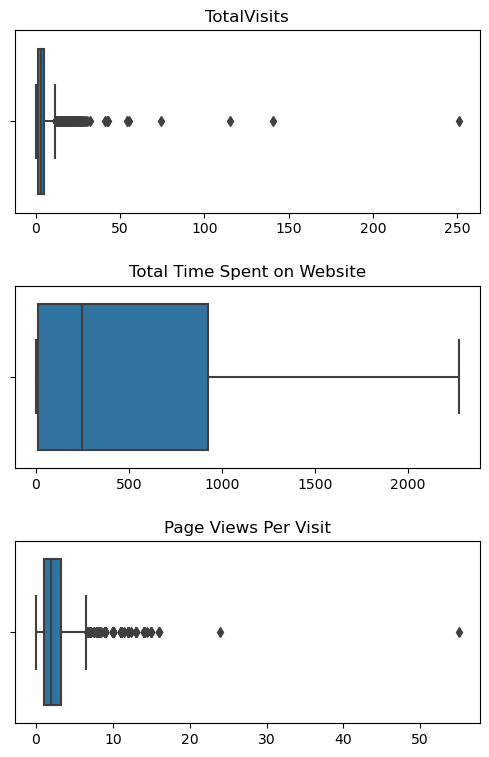

In [107]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 9), 
                       gridspec_kw={'height_ratios': [1, 1, 1], 'width_ratios': [1], 'hspace': 0.4})

features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

for i, feature in enumerate(features):
    ax = axs[i]
    sns.boxplot(leadsdata_with_no_IDs[feature], ax=ax)
    ax.set_title(feature)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

##### 
1. We have many outliers with in the "Totalvisits" column, so let's truncate the outliers by finding 95th percentile value of the "TotalVisits" column in the "leadsdata_with_no_IDs" dataframe

2. Then replace all values in the "TotalVisits" column that are greater than or equal to that value with the 95th percentile value


In [108]:
q1 = leadsdata_with_no_IDs["TotalVisits"].quantile(0.95)
leadsdata_with_no_IDs["TotalVisits"][leadsdata_with_no_IDs["TotalVisits"] >= q1] = q1

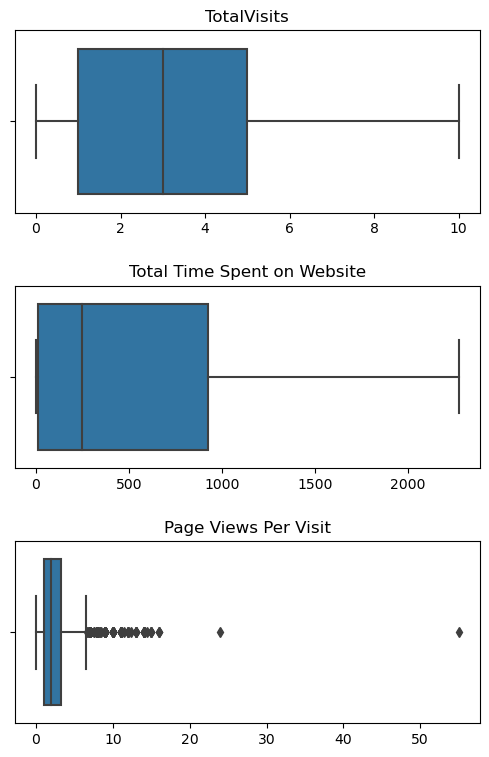

In [109]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 9), 
                       gridspec_kw={'height_ratios': [1, 1, 1], 'width_ratios': [1], 'hspace': 0.4})

features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

for i, feature in enumerate(features):
    ax = axs[i]
    sns.boxplot(leadsdata_with_no_IDs[feature], ax=ax)
    ax.set_title(feature)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

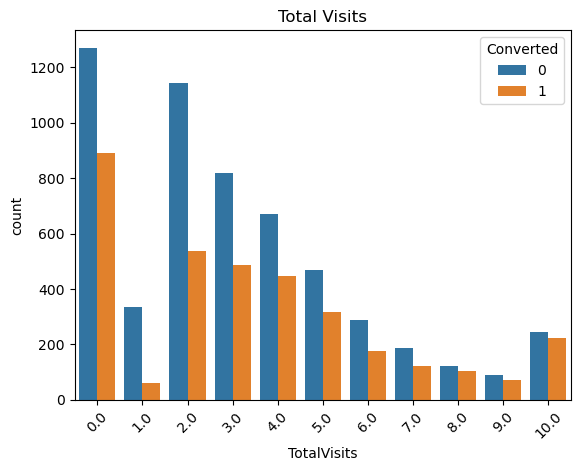

In [110]:
sns.countplot(x='TotalVisits', hue='Converted', data=leadsdata_with_no_IDs)
plt.title("Total Visits")
plt.xticks(rotation=45)
plt.show()


#### 

1. Now, Let's move on and create Dummy Varibales for the selected Columns. 
2. 'City','Last Notable Activity', 'Lead Source', 'Last Activity','Tags', 'Specialization',
3. 'What is your current occupation','Lead Quality','Lead Origin'

In [111]:
dummy_variables = pd.get_dummies(leadsdata_with_no_IDs[['City','Last Notable Activity', 'Lead Source', 'Last Activity','Tags', 'Specialization','What is your current occupation',
                              'Lead Quality','Lead Origin']], drop_first=True)


In [112]:
dummy_variables.head(5)

,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [113]:
leadsdata_with_no_IDs = leadsdata_with_no_IDs.drop(['Last Notable Activity', 'Lead Source', 'City', 'Specialization'
                                                    ,'What is your current occupation','Tags','Lead Quality'
                                                    ,'Last Activity','Lead Origin'], axis=1)


In [114]:
leadsdata_with_no_IDs.head(5)

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0


In [115]:
leadsdata_with_no_IDs = pd.concat([leadsdata_with_no_IDs,dummy_variables],axis=1)

In [116]:
leadsdata_with_no_IDs.head(5)

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


### Train-Test Split

In [117]:

X = leadsdata_with_no_IDs.drop(['Converted','Prospect ID'], axis=1)
# Putting response variable to y
y = leadsdata_with_no_IDs['Converted']



In [118]:
# Splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [119]:
scaler = StandardScaler()

X_train[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']])



In [120]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
3009,0,-0.432779,-0.160255,-0.179666,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1012,1,-0.432779,-0.540048,-0.179666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
7987,0,0.643547,2.017593,0.058552,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


### Check for varibales or columns with higher Correlations which should be removed

In [121]:
conv_corr = leadsdata_with_no_IDs.corr()

conv_corr_uns = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Source_Facebook                           Lead Origin_Lead Import                  0.983684
Last Notable Activity_Unsubscribed             Last Activity_Unsubscribed               0.872656
Lead Source_Reference                          Lead Origin_Lead Add Form                0.866191
Last Notable Activity_Email Opened             Last Activity_Email Opened               0.861636
Last Notable Activity_SMS Sent                 Last Activity_SMS Sent                   0.853102
Last Notable Activity_Email Link Clicked       Last Activity_Email Link Clicked         0.800686
TotalVisits                                    Page Views Per Visit                     0.737996
Last Notable Activity_Page Visited on Website  Last Activity_Page Visited on Website    0.691811
Do Not Email                                   Last Activity_Email Bounced              0.620041
Last Notable Activity_Unreachable              Last Activity_Unreachable                0.594369
dtype: float64

Now, Let's drop highly correlated variables

In [122]:
X_test = X_test.drop(['Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','Lead Source_Facebook',
                      'Last Notable Activity_Unreachable','Last Notable Activity_Email Opened','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','Lead Source_Facebook',
                      'Last Notable Activity_Unreachable','Last Notable Activity_Email Opened','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [123]:
conv_corr = X_train.corr()


In [124]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)


Lead Source_Reference                Lead Origin_Lead Add Form              0.859537
TotalVisits                          Page Views Per Visit                   0.756104
Do Not Email                         Last Activity_Email Bounced            0.624939
Lead Source_Direct Traffic           Lead Origin_Landing Page Submission    0.516152
Tags_Already a student               Lead Quality_Worst                     0.514081
Lead Source_Olark Chat               Specialization_Others                  0.505771
Page Views Per Visit                 Lead Origin_Landing Page Submission    0.493007
Lead Source_Welingak Website         Lead Origin_Lead Add Form              0.468225
Last Notable Activity_Email Bounced  Last Activity_Email Bounced            0.450911
TotalVisits                          Lead Origin_Landing Page Submission    0.447765
dtype: float64

### Let's Move on to Model Building

Let's build a Logisitic Regression Model to check if this cirrectly classifies

In [125]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.1
Date:                Tue, 24 Jan 2023   Deviance:                       2552.2
Time:                        20:48:13   Pearson chi2:                 3.52e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    4.7294      2.119      2.232      0.026       0.576       8.883
Do Not Email                                            -1.3808      0.317     -4.356      0.000      -2.002      -0.759
TotalVisits                                              0.0705      0.085      0.827      0.408      -0.097       0.238
Total Time Spent on Website                              1.1464      0.063     18.107      0.000       1.022       1.271
Page Views Per Visit                                    -0.1218      0.085     -1.438      0.150      -0.288       0.044
Newspaper                                              -21.5965   2.16e+05    -0.0001      1.000   -4.23e+05    4.23e+05
City_Other Cities                                       -0.2691      0.220     -1.224      0.221      -0.700       0.162
City_Other Cities of Maharashtra                        -0.0782      0.259     -0.302      0.763      -0.586       0.429
City_Other Metro Cities                                  0.0917      0.280      0.328      0.743      -0.457       0.640
City_Thane & Outskirts                                  -0.1648      0.217     -0.761      0.447      -0.589       0.260
City_Tier II Cities                                      0.9226      0.667      1.384      0.166      -0.384       2.229
Last Notable Activity_Email Bounced                      0.8511      1.011      0.842      0.400      -1.130       2.832
Last Notable Activity_Email Marked Spam                 21.6351   1.39e+05      0.000      1.000   -2.72e+05    2.72e+05
Last Notable Activity_Email Received                    19.1268   2.16e+05   8.86e-05      1.000   -4.23e+05    4.23e+05
Last Notable Activity_Form Submitted on Website        -24.1512   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Last Notable Activity_Had a Phone Conversation          -0.5811      1.763     -0.330      0.742      -4.037       2.874
Last Notable Activity_Modified                          -1.6967      0.148    -11.465      0.000      -1.987      -1.407
Last Notable Activity_Olark Chat Conversation           -1.7160      0.482     -3.561      0.000      -2.661      -0.771
Last Notable Activity_Resubscribed to emails            19.0596   2.16e+05   8.82e-05      1.000   -4.23e+05    4.23e+05
Last Notable Activity_View in browser link Clicked     -21.8639   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                              -0.2735      0.847     -0.323      0.747      -1.933       1.386
Lead Source_Google                                      -0.0943      0.844     -0.112      0.911      -1.748       1.559
Lead Source_Olark Chat                                   0

### Let's implement the Feature Selection Using RFE

In [126]:

# Instantiate a logistic regression model
logreg = LogisticRegression()

# Instantiate an RFE object with 15 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)



In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 53),
 ('Newspaper', False, 63),
 ('City_Other Cities', False, 40),
 ('City_Other Cities of Maharashtra', False, 55),
 ('City_Other Metro Cities', False, 56),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', False, 19),
 ('Last Notable Activity_Email Bounced', False, 27),
 ('Last Notable Activity_Email Marked Spam', False, 48),
 ('Last Notable Activity_Email Received', False, 64),
 ('Last Notable Activity_Form Submitted on Website', False, 44),
 ('Last Notable Activity_Had a Phone Conversation', False, 15),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', False, 3),
 ('Last Notable Activity_Resubscribed to emails', False, 62),
 ('Last Notable Activity_View in browser link Clicked', False, 65),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark

In [128]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False])

In [129]:
columns = X_train.columns[rfe.support_]


In [130]:
X_train_sm = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1551.2
Date:                Tue, 24 Jan 2023   Deviance:                       3102.5
Time:                        20:48:18   Pearson chi2:                 3.80e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5702
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1200      0.227     -4.943      0.000      -1.564      -0.676
Do Not Email                                            -1.2180      0.220     -5.534      0.000      -1.649      -0.787
Last Notable Activity_Modified                          -1.6762      0.108    -15.574      0.000      -1.887      -1.465
Lead Source_Welingak Website                             4.1850      0.735      5.694      0.000       2.745       5.625
Last Activity_SMS Sent                                   2.0164      0.102     19.711      0.000       1.816       2.217
Tags_Already a student                                  -1.0335      0.790     -1.308      0.191      -2.581       0.515
Tags_Busy                                                3.3672      0.328     10.266      0.000       2.724       4.010
Tags_Closed by Horizzon                                  8.3898      0.773     10.847      0.000       6.874       9.906
Tags_Lost to EINS                                        9.2950      0.769     12.090      0.000       7.788      10.802
Tags_Ringing                                            -1.9950      0.337     -5.920      0.000      -2.656      -1.335
Tags_Will revert after reading the email                 3.5240      0.238     14.830      0.000       3.058       3.990
Tags_invalid number                                    -22.4726   1.35e+04     -0.002      0.999   -2.64e+04    2.64e+04
Tags_switched off                                       -2.5537      0.587     -4.353      0.000      -3.704      -1.404
What is your current occupation_Working Professional     1.3900      0.293      4.738      0.000       0.815       1.965
Lead Quality_Not Sure                                   -3.3814      0.132    -25.675      0.000      -3.639      -3.123
Lead Quality_Worst                                      -3.6425      0.862     -4.226      0.000      -5.332      -1.953
========================================================================================================================
"""

In [131]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.273409
1012    0.308880
9226    0.002116
4750    0.738662
7987    0.994141
1281    0.988113
2880    0.273409
4971    0.707294
7536    0.917129
1248    0.002116
dtype: float64

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27340853, 0.30888046, 0.00211576, 0.73866187, 0.99414066,
       0.98811338, 0.27340853, 0.70729352, 0.91712886, 0.00211576])

In [133]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.273409,3009
1,0,0.308880,1012
2,0,0.002116,9226
3,1,0.738662,4750
4,1,0.994141,7987


In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)




In [135]:
y_train_pred_final.head(5)

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.273409,3009,0
1,0,0.308880,1012,0
2,0,0.002116,9226,0
3,1,0.738662,4750,1
4,1,0.994141,7987,1


In [136]:
print("Accuracy is:", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))


Accuracy is: 0.9207998740355849


In [137]:
def calc_vif_value(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)



In [138]:
calc_vif_value(X_train[columns])


                                             Features  \
13                              Lead Quality_Not Sure   
9            Tags_Will revert after reading the email   
1                      Last Notable Activity_Modified   
3                              Last Activity_SMS Sent   
8                                        Tags_Ringing   
14                                 Lead Quality_Worst   
4                              Tags_Already a student   
12  What is your current occupation_Working Profes...   
0                                        Do Not Email   
5                                           Tags_Busy   
11                                  Tags_switched off   
6                             Tags_Closed by Horizzon   
7                                   Tags_Lost to EINS   
2                        Lead Source_Welingak Website   
10                                Tags_invalid number   

    Variance Inflation Factor  
13                       3.20  
9                      

Let's drop Tags_invalid_number as it has higher p value

In [139]:
columns = columns.drop('Tags_invalid number')


In [140]:
columns

Index(['Do Not Email', 'Last Notable Activity_Modified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Working Professional',
       'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

In [141]:
X_train_sm = sm.add_constant(X_train[columns])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1557.5
Date:                Tue, 24 Jan 2023   Deviance:                       3114.9
Time:                        20:48:19   Pearson chi2:                 3.71e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5694
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3102      0.227     -5.784      0.000      -1.754      -0.866
Do Not Email                                            -1.2090      0.220     -5.507      0.000      -1.639      -0.779
Last Notable Activity_Modified                          -1.6615      0.107    -15.473      0.000      -1.872      -1.451
Lead Source_Welingak Website                             4.1825      0.735      5.694      0.000       2.743       5.622
Last Activity_SMS Sent                                   1.9909      0.102     19.580      0.000       1.792       2.190
Tags_Already a student                                  -0.8385      0.789     -1.062      0.288      -2.386       0.709
Tags_Busy                                                3.5651      0.327     10.916      0.000       2.925       4.205
Tags_Closed by Horizzon                                  8.5613      0.774     11.065      0.000       7.045      10.078
Tags_Lost to EINS                                        9.4727      0.770     12.310      0.000       7.964      10.981
Tags_Ringing                                            -1.7865      0.335     -5.334      0.000      -2.443      -1.130
Tags_Will revert after reading the email                 3.7102      0.238     15.617      0.000       3.245       4.176
Tags_switched off                                       -2.3408      0.585     -4.000      0.000      -3.488      -1.194
What is your current occupation_Working Professional     1.4258      0.296      4.818      0.000       0.846       2.006
Lead Quality_Not Sure                                   -3.3734      0.131    -25.687      0.000      -3.631      -3.116
Lead Quality_Worst                                      -3.7029      0.854     -4.338      0.000      -5.376      -2.030
========================================================================================================================
"""

In [142]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.274201,3009,0
1,0,0.319386,1012,0
2,0,0.002149,9226,0
3,1,0.734474,4750,1
4,1,0.994050,7987,1


In [143]:
print("Accuracy is:", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy is: 0.9201700519603212


In [144]:
calc_vif_value(X_train[columns])

                                             Features  \
12                              Lead Quality_Not Sure   
9            Tags_Will revert after reading the email   
1                      Last Notable Activity_Modified   
3                              Last Activity_SMS Sent   
13                                 Lead Quality_Worst   
8                                        Tags_Ringing   
4                              Tags_Already a student   
11  What is your current occupation_Working Profes...   
0                                        Do Not Email   
5                                           Tags_Busy   
10                                  Tags_switched off   
6                             Tags_Closed by Horizzon   
7                                   Tags_Lost to EINS   
2                        Lead Source_Welingak Website   

    Variance Inflation Factor  
12                       3.13  
9                        2.86  
1                        1.66  
3               

#### Write a function to calculate True & False Positives and True & False negatives, Also other scores that we need multile times during this model building

In [145]:
def build_model(y_true, y_predicted, do_you_want_to_print=False):

    cmx = metrics.confusion_matrix(y_true, y_predicted)

    # true positive 
    TP = cmx[1,1] 
    # true negatives
    TN = cmx[0,0] 
    # false positives
    FP = cmx[0,1] 
    # false negatives
    FN = cmx[1,0] 

    # Accuracy score
    accuracy_score = metrics.accuracy_score(y_true, y_predicted)
    # Sensitivity score
    sensitivity_score = TP / float(TP+FN)
    # Specificity score
    specificity_score = TN / float(TN+FP)
    # Precision score
    precision_score = metrics.precision_score(y_true, y_predicted)
    
    if do_you_want_to_print:
        print("Confusion Matrix: \n", cmx)
        print("Accuracy:", accuracy_score)
        print("Sensitivity:", sensitivity_score)
        print("Specificity:", specificity_score)
        print("Precision:", precision_score)
        
    return accuracy_score, sensitivity_score, specificity_score, precision_score

In [146]:
build_model(y_train_pred_final.Convert, y_train_pred_final.predicted, do_you_want_to_print=True)


Confusion Matrix: 
 [[3757  148]
 [ 359 2087]]
Accuracy: 0.9201700519603212
Sensitivity: 0.8532297628781684
Specificity: 0.9620998719590269
Precision: 0.9337807606263983


(0.9201700519603212,
 0.8532297628781684,
 0.9620998719590269,
 0.9337807606263983)

## Now, Let's move on to plotting ROC Curve

In [147]:
def sketch_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob
                                         , drop_intermediate = False )


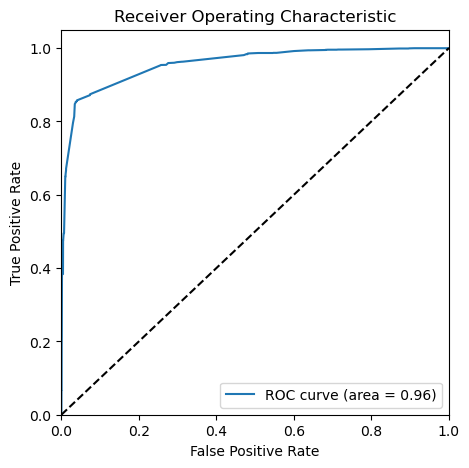

In [149]:
sketch_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)


### Now Let's Find the Optimal Cutoff Point
 

In [150]:
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.274201,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.319386,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.002149,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.734474,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.994050,7987,1,1,1,1,1,1,1,1,1,1,1


### Calculate accuracy sensitivity & specificity for various probability cutoffs.


In [151]:
scores = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = build_model(y_train_pred_final.Convert, y_train_pred_final[i])
    scores.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

scores

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.794835,0.962796,0.689629,0.660219
0.2,0.2,0.810109,0.959526,0.716517,0.679502
0.3,0.3,0.905999,0.874080,0.925992,0.880923
0.4,0.4,0.920170,0.856909,0.959795,0.930315
0.5,0.5,0.920170,0.853230,0.962100,0.933781
0.6,0.6,0.920800,0.853230,0.963124,0.935455
0.7,0.7,0.907731,0.813164,0.966965,0.939093
0.8,0.8,0.864273,0.666803,0.987964,0.971990
0.9,0.9,0.860652,0.655356,0.989245,0.974468


### We will now plot accuracy, sensitivity & specificity for different probabilities.


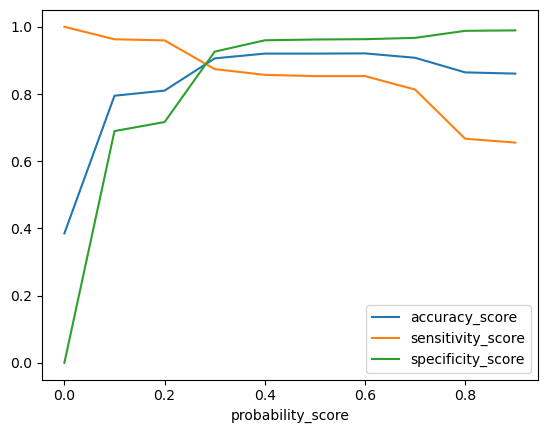

In [152]:
scores.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

#### As per the above graph: 0.3 is the optimal cutoff probability.


### Precision-Recall Trade off

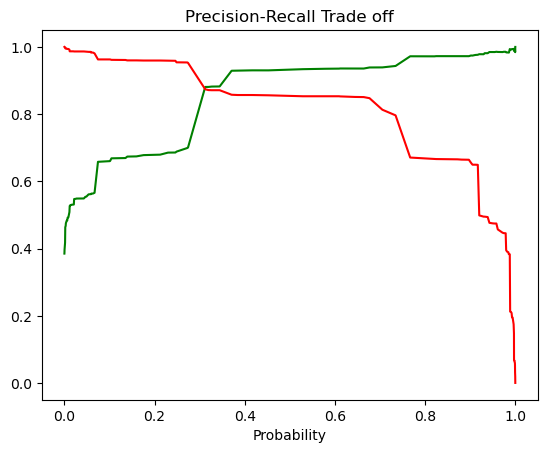

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

### As the model's MSE is close to 0, our model accurately predicts the variance between the test and train datasets

In [154]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.274201,3009,1,27
1,0,0.319386,1012,1,32
2,0,0.002149,9226,0,0
3,1,0.734474,4750,1,73
4,1,0.994050,7987,1,99


In [155]:
build_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, do_you_want_to_print=True)


Confusion Matrix: 
 [[2902 1003]
 [ 113 2333]]
Accuracy: 0.8242796410014172
Sensitivity: 0.9538021259198691
Specificity: 0.7431498079385404
Precision: 0.6993405275779376


(0.8242796410014172,
 0.9538021259198691,
 0.7431498079385404,
 0.6993405275779376)

In [156]:
X_test_sm = sm.add_constant(X_test[columns])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.274201,1,27
1,1,1490,0.978665,1,98
2,0,7936,0.274201,1,27
3,1,4216,0.996277,1,100
4,0,3830,0.274201,1,27


In [157]:
build_model(y_predicted_final.Converted, y_predicted_final.final_predicted, do_you_want_to_print=True)



Confusion Matrix: 
 [[1260  474]
 [  67  922]]
Accuracy: 0.8013220712449505
Sensitivity: 0.9322548028311426
Specificity: 0.726643598615917
Precision: 0.660458452722063


(0.8013220712449505, 0.9322548028311426, 0.726643598615917, 0.660458452722063)

## Final Shortlisted Model

In [158]:
def calculate_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    print("\033[1m"+"|"+" "*20+"Training Data Results"+" "*20+"|")
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    print(y_train_pred_final.head())
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    print("\033[1m"+"|"+" "*20+"Test Data Results"+" "*21+"|")
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    print(y_test_pred_final.head())
    print("\033[1m"+"|"+"\033[0m"+"\033[1m"+"-"*50+"\033[0m")
    print("------------------Model Evaluation Metrics-------------------\n")
    build_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, do_you_want_to_print=True)

    return y_test_pred_final.head(50)
    

In [159]:
calculate_cutoff(X_train[columns], y_train, X_test[columns], y_test, cutoff=0.27)


|--------------------------------------------------
|                    Training Data Results                    |
|--------------------------------------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.274201                  1          27
1         1012          0             0.319386                  1          32
2         9226          0             0.002149                  0           0
3         4750          1             0.734474                  1          73
4         7987          1             0.994050                  1          99
|--------------------------------------------------
|--------------------------------------------------
|                    Test Data Results                     |
|--------------------------------------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.274201                  1    

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.274201,1,27
1,1490,1,0.978665,1,98
2,7936,0,0.274201,1,27
3,4216,1,0.996277,1,100
4,3830,0,0.274201,1,27
5,1800,1,0.978665,1,98
6,6507,0,0.011214,0,1
7,4821,0,0.000889,0,0
8,4223,1,0.987761,1,99
9,4714,0,0.344340,1,34


Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

The final model has a sensitivity of 0.932, indicating that it can correctly predict 93% of the positive conversions

The final model has a precision of 0.66, which means that 66% of the leads that it predicted as "hot" are actually true hot leads.